In [116]:
# Requied pakages:
import os
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [117]:
main_data = pd.read_csv("Test_data.csv")
main_data.head()

,0,SNo,Roll No,Name,Hackerrank Id,Unnamed: 5,Unnamed: 6,1,2,3,...,Star Rating,Short/Long Challenge,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Maths>=500 && PS>=4,0.1
0,1,1,2.200000e+12,AARYAN PANDEY,aaryanpandey237,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AARYAN PANDEY
1,2,2,2.200000e+12,AAYUSH KUMAR,aayush12a19284,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,Certification Done,12/16/2023,NaN,NaN,NaN,NaN,NaN,
2,3,3,2.200000e+12,ABHISHEK VISHWAKARMA,abhivish1509,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
3,4,4,2.200000e+12,ADARSH MANI,CSEA_22B0101152,NaN,NaN,1.0,1.0,1.0,...,NaN,NaN,Certification Done,NaN,NaN,NaN,NaN,NaN,NaN,
4,5,5,2.200000e+12,ADHISHREE SRIVASTAVA,CSEA_22b0101087,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADHISHREE SRIVASTAVA


In [118]:
required_data = main_data.iloc[:,3:5]
required_data.head(10)

,Name,Hackerrank Id
0,AARYAN PANDEY,aaryanpandey237
1,AAYUSH KUMAR,aayush12a19284
2,ABHISHEK VISHWAKARMA,abhivish1509
3,ADARSH MANI,CSEA_22B0101152
4,ADHISHREE SRIVASTAVA,CSEA_22b0101087
5,ADITYA KUMAR,NaN
6,ADITYA KUMAR PIPIL,aditya_22b010112
7,ADITYA PANCHAL,adityazxcv6
8,ADITYA SINGH,aditya_22b010102
9,AJAY KUMAR,ajay_22b0101169


In [128]:
tyrequired_data["Hackerrank Id"][0]==float

False

In [124]:
#Data fetcher
fetch_data = {}
badge_list = ["Problem Solving","CPP","C language","Python","Java","Ruby",
              "Sql","Days of Code","Days of JS","Days of Statistics"]

for index in range(len(required_data)):
    if type(required_data["Hackerrank Id"][index]) == float:
        print(required_data["Name"][index]+" ID is not avaliable")
        continue
    url = r"https://www.hackerrank.com/profile"+"//"+str(required_data["Hackerrank Id"][index])
    agent = {"User-Agent":'Chrome/123.0.6312.86'}
    response = requests.get(url,headers=agent)
    if response.status_code == 200:
        user_data = {}
        temp = {}
        main_html_parser = BeautifulSoup(response.text, 'html.parser')
        check = main_html_parser.find(class_="cdn-error-view")
        if check != None:
            print(required_data["Name"][index]+" ID is incorrect")
            continue
        badges = main_html_parser.find_all(class_="hacker-badge")
        for i,badge_html in enumerate(badges):
            badge_html_parser = BeautifulSoup(str(badge_html), 'html.parser')
            badge_title = badge_html_parser.find(class_="badge-title").text
            stars = len(badge_html_parser.find_all(class_="star"))
            user_data[badge_title]=stars

        for name in badge_list:
            if name in user_data:
                temp[name]=user_data[name]
            else: temp[name]=0
        fetch_data[required_data["Name"][index]] = temp
    else:
        print('Failed to retrieve the webpage',required_data["Name"][index])
        

AKANSHA KASHYAP ID is incorrect
AKASH SOLANKI ID is incorrect
ANSHIKA GUPTA ID is incorrect
ANUSHKA JAISWAL ID is incorrect
ARPIT GUPTA ID is incorrect
ARUN KUMAR ID is incorrect
Failed to retrieve the webpage ASHISH SINGH
ASTIKA SINHA ID is incorrect
ATHARV MITTAL ID is incorrect
DURGESH SINGH CHAUHAN ID is incorrect


In [125]:
#converter
excel_data = {}
for badge_name in badge_list:
    temp = {}
    for name in fetch_data:
        temp[name] = fetch_data[name][badge_name]
    excel_data[badge_name]=temp

In [126]:
excel_data = pd.DataFrame(excel_data)
excel_data.head(10)

,Problem Solving,CPP,C language,Python,Java,Ruby,Sql,Days of Code,Days of JS,Days of Statistics
AARYAN PANDEY,2,0,0,0,0,0,0,0,0,0
AAYUSH KUMAR,4,0,0,0,0,0,0,0,0,0
ABHISHEK VISHWAKARMA,3,1,1,0,0,0,0,0,0,0
ADARSH MANI,2,0,0,0,0,0,0,0,0,0
ADHISHREE SRIVASTAVA,0,0,0,0,0,0,0,0,0,0
ADITYA KUMAR,0,0,0,0,0,0,0,0,0,0
ADITYA KUMAR PIPIL,0,0,0,0,0,0,0,0,0,0
ADITYA PANCHAL,5,2,4,0,0,0,0,0,0,0
ADITYA SINGH,3,0,0,0,0,0,0,0,0,0
AJAY KUMAR,4,0,0,0,0,0,0,0,0,0


<AxesSubplot: >

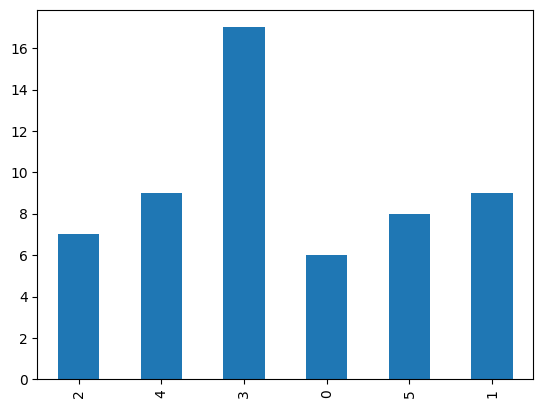

In [150]:
import matplotlib.pyplot as plt
data_problem_solving = excel_data["Problem Solving"].value_counts(sort = False)
data_problem_solving.plot.bar()

<AxesSubplot: >

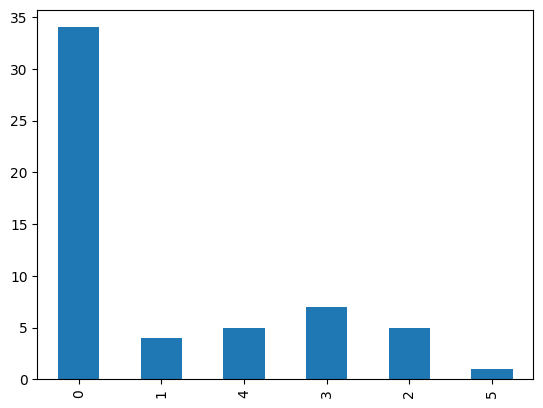

In [151]:
data_problem_solving = excel_data["C language"].value_counts(sort = False)
data_problem_solving.plot.bar()

<AxesSubplot: >

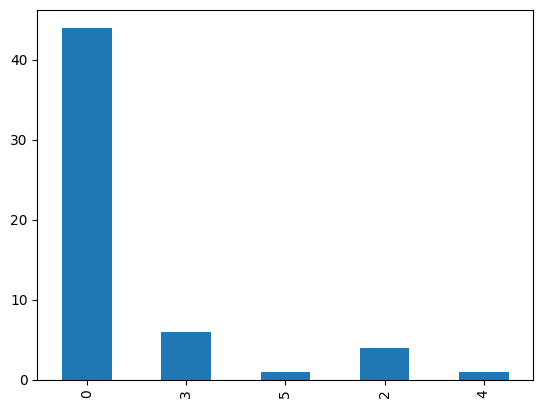

In [152]:
data_problem_solving = excel_data["Python"].value_counts(sort = False)
data_problem_solving.plot.bar()

<AxesSubplot: >

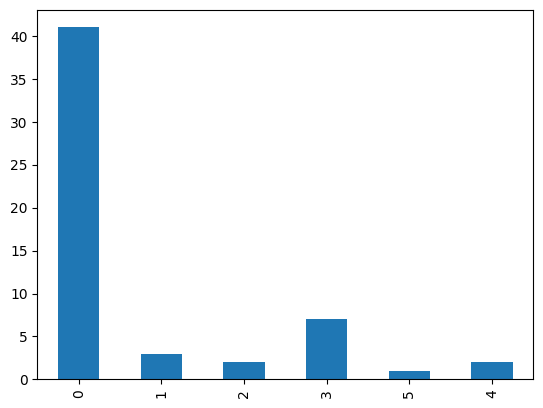

In [153]:
import matplotlib.pyplot as plt
data_problem_solving = excel_data["CPP"].value_counts(sort = False)
data_problem_solving.plot.bar()

<AxesSubplot: >

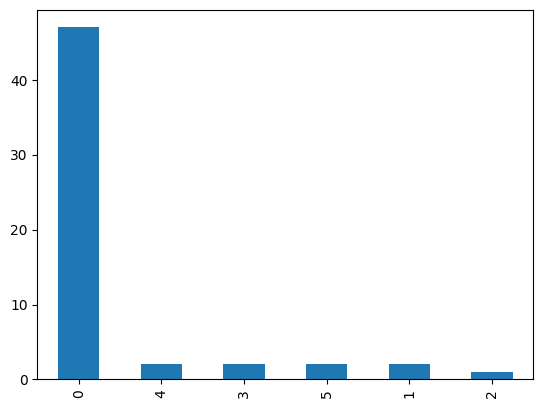

In [154]:
import matplotlib.pyplot as plt
data_problem_solving = excel_data["Java"].value_counts(sort = False)
data_problem_solving.plot.bar()

In [155]:
#excel_data.to_csv("CSEA_2-year.csv")

In [161]:
# fetch Certificates

url = "https://www.hackerrank.com/profile/CSEB_21B0101054"
agent = {"User-Agent":'Chrome/123.0.6312.86'}
response = requests.get(url,headers=agent)
if response.status_code == 200:
    certificate_titles = []
    main_html_parser = BeautifulSoup(response.text, 'html.parser')
    certificates = main_html_parser.find_all(class_="certificate_v3 certificate_v3-skill")
    for certificate in certificates:
        certificate_titles.append(certificate.find(class_ = "certificate_v3-heading").text)

print(certificate_titles)

['Certificate: Problem Solving (Basic)', 'Certificate: Python (Basic)']
